# Exploration Data Analysis (EDA) and Cleaning

- EDA - Data exploration analysis (ensure better information understanding, availability and accuracy)
    - Variables Identification
        - Naming convention consistency application
        - De-duplication of observations
        - (classification) ballanced/imbalance dataset handling
    - Univariate Analysis
    - Bi-variate Analysis
    - Missing Values Handling
    - Outliers
- Data preprocessing, feature engineering (make data ready for ML, have a remarkable impact on the power of prediction)
    - Variables transformation
        - normalization
        - standardization
    - Variable creation
        - character encoding
    - Working with dates
    - Inconsistent data entry
- Re-assessment and iteration

It is important to go into your initial data exploration with a big picture question in mind since the goal of your analysis should inform how you prepare the data.

## Objective



## Dataset description

## Useful Python code snippets

In [25]:
def template_function(arg1):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """ 
    return arg1 

In [18]:
# Unnamed (anonymous) functions called Lambda functions
# The values x, y are the arguments of the function 
# and the code after the colon is the value that the function returns.
lambda x, y: x + y

# You can assign a lambda function a variable name and use it just like a normal function:
my_function2 = lambda x, y: x + y
my_function2(5, 10)

15

In [19]:
# map() takes a function and an iterable like a list as arguments 
# and applies the function to each item in the iterable. 
# Instead of defining a function and then passing that function to map(), 
# we can define a lambda function right in the call to map()
my_map = map(lambda x: x**2, [1, 2, 3, 4, 5]) 

for item in my_map:
    print(item)

1
4
9
16
25


In [20]:
# List comprehensions let you populate lists in one line of code 
# by taking the logic you would normally put a for loop 
# and moving it inside the list brackets.
my_list2 = [number for number in range(0, 10)]
print(my_list2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
my_list3 = [number for number in range(0, 10) if number % 2 == 0]
print(my_list3)

[0, 2, 4, 6, 8]


In [22]:
combined = [a + b  for a in "life" for b in "study"]
print (combined)

['ls', 'lt', 'lu', 'ld', 'ly', 'is', 'it', 'iu', 'id', 'iy', 'fs', 'ft', 'fu', 'fd', 'fy', 'es', 'et', 'eu', 'ed', 'ey']


In [23]:
# Dictionary comprehension
words = ["life","is","study"]
word_length_dict2 = {word:len(word) for word in words}
print(word_length_dict2)

{'life': 4, 'is': 2, 'study': 5}


In [24]:
# You can pair the items in two sequences into tuples 
# using the built in Python function zip():
words = ["life","is","study"]
word_lengths = [4, 2, 5]
pairs = zip(words, word_lengths)

for item in pairs:
    print (item)

('life', 4)
('is', 2)
('study', 5)


In [6]:
type(12)

int

In [7]:
isinstance(12, int)

True

In [8]:
list1 = [1,2,3]

tuple1 = ("Tuples are Immutable", list1)

tuple2 = tuple1[:]                       # Make a shallow copy

list1.append("But lists are mutable")

print( tuple2 )                          # Print the copy

('Tuples are Immutable', [1, 2, 3, 'But lists are mutable'])


In [9]:
import copy

list1 = [1,2,3]

tuple1 = ("Tuples are Immutable", list1)

tuple2 = copy.deepcopy(tuple1)           # Make a deep copy

list1.append("But lists are mutable")

print( tuple2 )                          # Print the copy

('Tuples are Immutable', [1, 2, 3])


## Load Data

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import xgboost as xgb



import os

#import warnings
#warnings.filterwarnings('ignore')

%matplotlib inline

seed = 1234

In [ ]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, sklearn, requests, beautifulsoup4, bokeh

In [11]:
# Get current directory
os.getcwd() 

'/Users/ksatola/Documents/git/Data-Science-Templates'

In [ ]:
# Change current directory
os.chdir('C:\\Users\\Greg\\Desktop\\intro_python10')

In [12]:
# List all objects in a directory
os.listdir(os.getcwd())

['Resources.ipynb',
 '.DS_Store',
 'images',
 'README.md',
 'Data_Science_Process.ipynb',
 '.gitignore',
 'EDA_Template.ipynb',
 '.gitattributes',
 '.ipynb_checkpoints',
 'ML_Performance_Metrics.ipynb',
 '.git',
 'data',
 'Definitions.ipynb']

In [14]:
# Read tabular data from the specified url
url = "http://www.basketball-reference.com/leagues/NBA_2015_totals.html"
BB_data = pd.read_html(url)
# read_html() returns a list of DataFrames
len(BB_data)

1

In [2]:
# Load a dataset
# https://www.kaggle.com/c/titanic/data
df_titanic = pd.read_csv("data/titanic_train.csv")

In [26]:
df_titanic.shape

(891, 12)

There are 891 `observations` / `cases` in the dataset.

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df_titanic.sample(5, random_state=seed)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C


## Naming Convention and Consistency

In [ ]:
# Rename "sex" column
table2.rename(columns={"sex":"gender"}, inplace=True)

## Merging

Both data frames contain the column "P_ID" but the other columns are different. A unique identifier like an ID is usually a good key for joining two data frames together. You can combine two data frames by a common column with merge():

In [ ]:
combined1 = pd.merge(table1,       # First table
                    table2,        # Second table
                    how="inner",   # Merge method
                    on="P_ID")     # Column(s) to join on

An inner join only merges records that appear in both columns used for the join. Inner joins ensure that we don't end up introducing missing values in our data. If you want to keep more of your data and don't mind introducing some missing values, you can use merge to perform other types of joins, such as left joins, right joins and outer joins.

In [ ]:
# A left join keeps all key values in the first(left) data frame

left_join = pd.merge(table1,       # First table
                    table2,        # Second table
                    how="left",   # Merge method
                    on="P_ID")     # Column(s) to join on

left_join

In [ ]:
# A right join keeps all key values in the second(right) data frame

right_join = pd.merge(table1,       # First table
                    table2,        # Second table
                    how="right",   # Merge method
                    on="P_ID")     # Column(s) to join on

right_join

In [ ]:
# An outer join keeps all key values in both data frames

outer_join = pd.merge(table1,      # First table
                    table2,        # Second table
                    how="outer",   # Merge method
                    on="P_ID")     # Column(s) to join on

outer_join

## Variables Identification

### Variables types
- **input** (predictors, independent features / variables / observations / attributes)
- **output** (target, dependent feature / variable / attribute, ground truth)

### Variables categories
- Continuous / Discrete
- Categorical
    - Nominal
    - Ordinal
    
qualitative and quantitative

### Data types
- Numeric
- Textual

## TODO
- wypisac z dataset - zob. opis w Kaggle
- wypisac i sklasyfikowac
- porownac zbior z modyfikacjami (predykcja) do zbioru bez modyfikacji (pousuwane missing i outlier) oraz do zbioru bez zadnych zmian
- for normality tests for small dataset, I have observed from various literatures, if your n > 50 you should use kolmogorov-smirnov, and if n<50, should go for Shapiro-Wilk.

In [ ]:
df.dtypes

In [ ]:
sorted(titanic_train["Name"])[0:15]   # Check the first 15 sorted names

In [ ]:
titanic_train["Name"].describe()

In [ ]:
titanic_train["Cabin"].unique()   # Check unique cabins

In [ ]:
char_cabin = titanic_train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

### De-duplication

In [ ]:
# 
df.duplicated()
df.drop_duplicates(inplace=True)

### Ballance / Imbalanced Dataset Handling

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. You can have a class imbalance problem on two-class classification problems as well as multi-class classification problems. Most techniques can be used on either.

Most classification data sets do not have exactly equal number of instances in each class, but a small difference often does not matter.

There are problems where a class imbalance is not just common, it is expected. For example, in datasets like those that characterize fraudulent transactions are imbalanced. The vast majority of the transactions will be in the “Not-Fraud” class and a very small minority will be in the “Fraud” class.

Another example is customer churn datasets, where the vast majority of customers stay with the service (the “No-Churn” class) and a small minority cancel their subscription (the “Churn” class).

When there is a modest class imbalance like 4:1 in the example above it can cause problems.

Methods of handling imbalanced datasets:

- **Collect more data**. Collecting more data is almost always overlooked. A larger dataset might expose a different and perhaps more balanced perspective on the classes.
- **Change Your Performance Metric**. `Accuracy` is not the metric to use when working with an imbalanced dataset. The following performance measures can give more insight into the accuracy of the model than traditional classification accuracy:

    - **Confusion Matrix**: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
    - **Precision**: A measure of a classifiers exactness.
    - **Recall**: A measure of a classifiers completeness.
    - **F1 Score (or F-score)**: A weighted average of precision and recall.
    - **Kappa (or Cohen’s kappa)**: Classification accuracy normalized by the imbalance of the classes in the data.
    - **ROC Curves**: Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.
   
- **Resample Your Dataset**. Change the dataset that you use to build your predictive model to have more balanced data. This change is called sampling your dataset and there are two main methods that you can use to even-up the classes:

    - You can add copies of instances from the under-represented class called `over-sampling` (or more formally `sampling with replacement`), or
    - You can delete instances from the over-represented class, called `under-sampling`.

    Some Rules of Thumb

        - Consider testing under-sampling when you have an a lot data (tens- or hundreds of thousands of instances or more)
        - Consider testing over-sampling when you don’t have a lot of data (tens of thousands of records or less)
        - Consider testing random and non-random (e.g. stratified) sampling schemes.
        - Consider testing different resampled ratios (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)
        
- **Generate Synthetic Samples**. A simple way to generate synthetic samples is to randomly sample the attributes from instances in the minority class. There are systematic algorithms that you can use to generate synthetic samples. The most popular of such algorithms is called SMOTE or the Synthetic Minority Over-sampling Technique. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

- **Try Different Algorithms**. For example, decision trees often perform well on imbalanced datasets. The splitting rules that look at the class variable used in the creation of the trees, can force both classes to be addressed.

- **Penalized Models**. Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class. Often the handling of class penalties or weights are specialized to the learning algorithm. There are penalized versions of algorithms such as penalized-SVM and penalized-LDA. 

- **Different Perspective**. There are fields of study dedicated to imbalanced datasets. They have their own algorithms, measures and terminology. Two you might like to consider are `anomaly detection` and `change detection`.

In [ ]:
# handle highly unbalanced datasets, with a focus on resampling
# Let's see how unbalanced the dataset is
target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like `accuracy_score` can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

The `Normalized Gini Coefficient`, is arobust metric for imbalanced datasets, that ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score.

A widely adopted technique for dealing with highly unbalanced datasets is called `resampling`. It consists of removing samples from the majority class (`under-sampling`) and / or adding more examples from the minority class (`over-sampling`).

<img src="images/resampling.png" alt="Correlations" style="width: 800px;"/>


The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

#### Random under and over sampling

In [ ]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

In [ ]:
# Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
# Random over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library [imbalanced-learn](https://imbalanced-learn.org/en/stable/index.html). It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [ ]:
# https://imbalanced-learn.org/en/stable/index.html
import imblearn
# For ease of visualization, let's create a small unbalanced sample dataset using the make_classification method:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
# We will also create a 2-dimensional plot function, plot_2d_space, to see the data distribution:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
# Because the dataset has many dimensions (features) and our graphs will be 2D, 
# we will reduce the size of the dataset using Principal Component Analysis (PCA):
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [ ]:
# Random under-sampling and over-sampling with imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [ ]:
# Random over-sampling and over-sampling with imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

#### Under-sampling: Tomek links
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

<img src="images/resampling-tomeklinks.png" alt="Correlations" style="width: 800px;"/>


In [ ]:
# Under-sampling: Tomek links
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

#### Under-sampling: Cluster Centroids

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In this example we will pass the {0: 10} dict for the parameter ratio, to preserve 10 elements from the majority class (0), and all minority class (1).

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

#### Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

<img src="images/resampling-smote.png" alt="Correlations" style="width: 800px;"/>


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

#### Over-sampling followed by under-sampling

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

## Descriptive Statistics

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis.

Descriptive statistics help you explore features of your data, like center, spread and shape by summarizing them with numerical measurements. Descriptive statistics help inform the direction of an analysis and let you communicate your insights to others quickly and succinctly. In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.

### Measures of Center

The mean is simply an average: the sum of the values divided by the total number of records. As we've seen in previous lessons we can use df.mean() to get the mean of each column in a DataFrame:

In [ ]:
mtcars.index = mtcars["name"]
mtcars.mean()                 # Get the mean of each column

In [ ]:
mtcars.mean(axis=1)           # Get the mean of each row

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it. As we've seen previously, you can get the median using the df.median() function:

In [ ]:
mtcars.median()                 # Get the median of each column

In [ ]:
mtcars.median(axis=1)           # Get the median of each row

In a symmetric distribution, the mean and median will be the same.

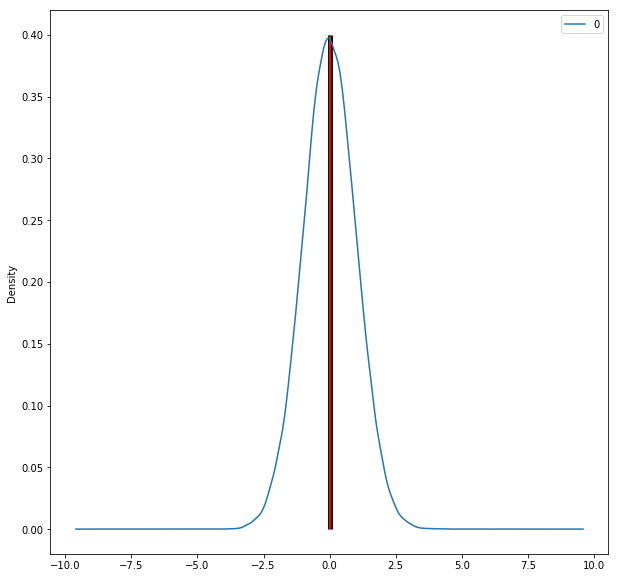

In [6]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10))


plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red")

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew

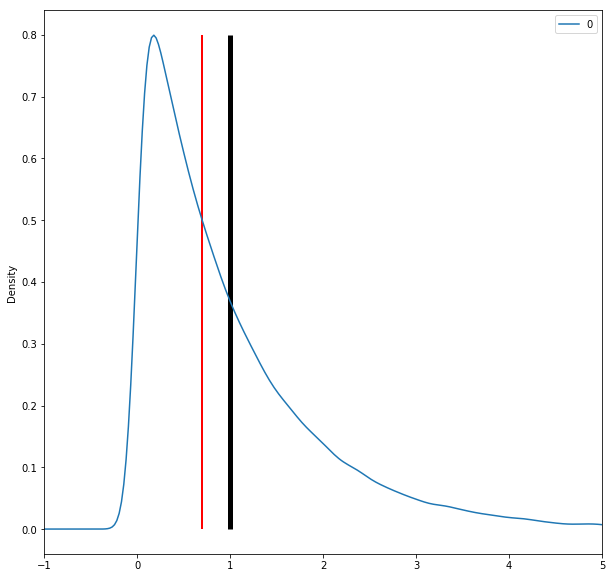

In [7]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-1,5))


plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0)

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red")

The mean is also influenced heavily by outliers, while the median resists the influence of outliers. Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

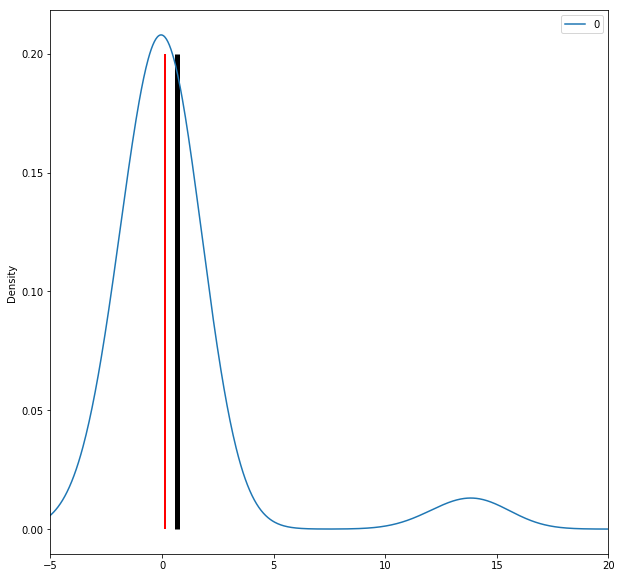

In [8]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20))


plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0)

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red")

The mode of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. Find the mode with df.mode(). The columns with multiple modes (multiple values with the same count) return multiple values as the mode. Columns with no mode (no value that appears more than once) return NaN.

In [ ]:
mtcars.mode()

### Measures of Spread
Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.
One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [ ]:
max(mtcars["mpg"]) - min(mtcars["mpg"])

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [9]:
five_num = [mtcars["mpg"].quantile(0),   
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

NameError: name 'mtcars' is not defined

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by df.describe():

In [ ]:
mtcars["mpg"].describe()

Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [ ]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

The boxplots we learned to create in the lesson on plotting are just visual representations of the five number summary and IQR:

In [ ]:
mtcars.boxplot(column="mpg",
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

In [ ]:
mtcars["mpg"].var()

The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

In [ ]:
mtcars["mpg"].std()

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [ ]:
abs_median_devs = abs(mtcars["mpg"] - mtcars["mpg"].median())

abs_median_devs.median() * 1.4826
# *Note: The MAD is often multiplied by a scaling factor of 1.4826.

## Skewness and Kurtosis
Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures the "peakedness" of a distribution.  We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [ ]:
mtcars["mpg"].skew()  # Check skewness

In [ ]:
mtcars["mpg"].kurt()  # Check kurtosis

In [10]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

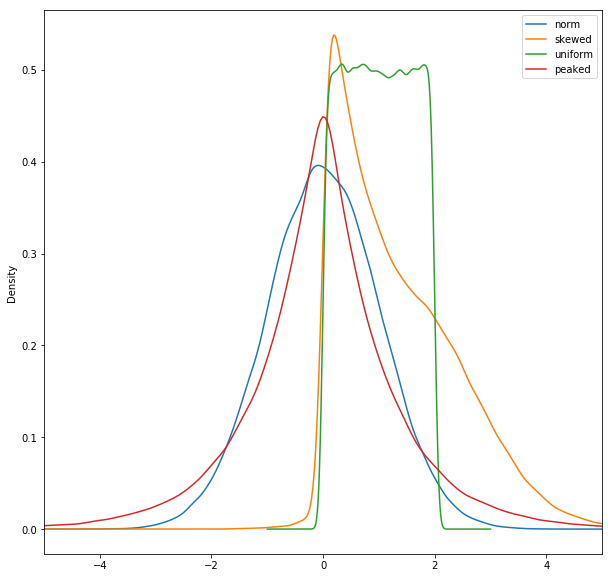

In [11]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5))

Now let's check the skewness of each of the distributions. Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [12]:
data_df.skew()

norm      -0.005233
skewed     1.019686
uniform    0.002725
peaked    -0.026392
dtype: float64

Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [13]:
data_df.kurt()

norm      -0.017133
skewed     1.411248
uniform   -1.203724
peaked     3.031001
dtype: float64

## Probability Distributions

Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs.). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events.

### The Uniform Distribution

The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.
Many useful functions for working with probability distributions in Python are contained in the scipy.stats library. Let's load in some libraries, generate some uniform data and plot a density curve:

In [14]:
import scipy.stats  as stats

In [15]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

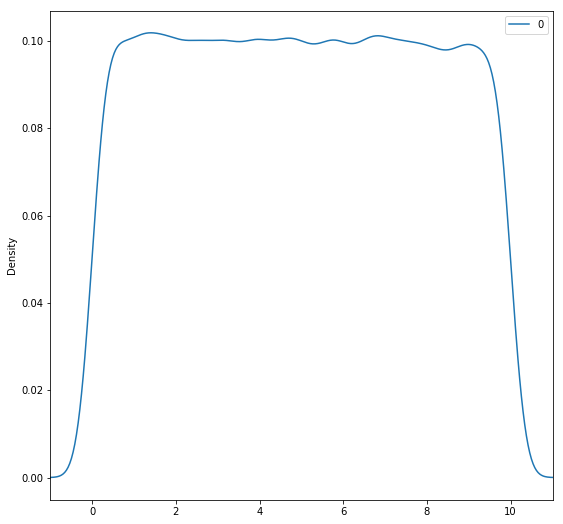

In [16]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

*Note: the plot above is an approximation of the underlying distribution, since it is based on a sample of observations.

In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.
Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:

-stats.distribution.rvs() generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).

-stats.distribution.cdf() is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the cumulative distribution function.). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [17]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

-stats.distribution.ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [18]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

-stats.distribution.pdf() gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [19]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) ) 

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

### Generating Random Numbers and Setting The Seed

When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using stats.distribution.rvs(). Python also comes with a library called "random" that lets you perform various operations that involve randomization. Let's look at a few functions in the random library:

In [20]:
import random

In [21]:
random.randint(0,10)     # Get a random integer in the specified range

3

In [22]:
random.choice([2,4,6,9]) # Get a random element from a sequence

9

In [23]:
random.random()          # Get a real number between 0 and 1

0.3223295816387006

In [24]:
random.uniform(0,10)     # Get a real number in the specified range

3.8137838948931257

Regardless of the method you use to generate random numbers, however, the result of a random process can differ from one run to the next. Having results vary each time you run a function is often not desirable. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function. Set the random seed with random.seed():

In [26]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


Many functions in Python's libraries that use randomness have an optional random seed argument built in so that you don't have to set the seed outside of the function. For instance, the rvs() function has an optional argument random_state, that lets you set the seed.

* Note: The Python standard library "random" has a separate internal seed from the numpy library. When using functions from numpy and libraries built on top of numpy (pandas, scipy, scikit-learn) use np.random.seed() to set the seed.

### The Normal Distribution

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

The scipy nickname for the normal distribution is norm. Let's investigate the normal distribution:

In [27]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

Text(1.4, 0.03, '0.159')

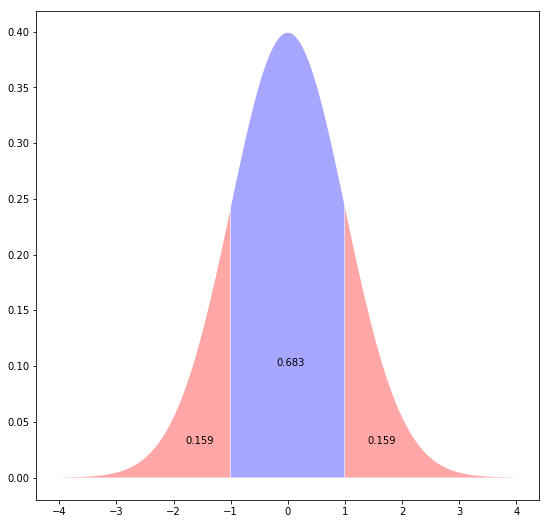

In [28]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean.

Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [29]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.

* Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution.

### The Binomial Distribution

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   9  80  465  1141  2033  2466  2026  1224  449  96  11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1baa1550>]],
      dtype=object)

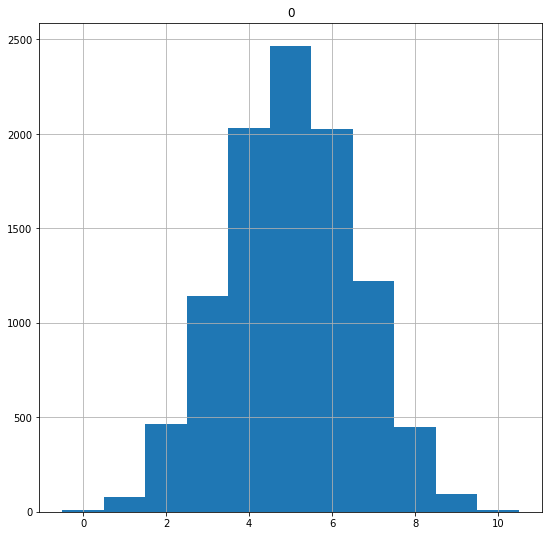

In [30]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   8  49  257  920  2027  3041  2670  1028


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1baa1048>]],
      dtype=object)

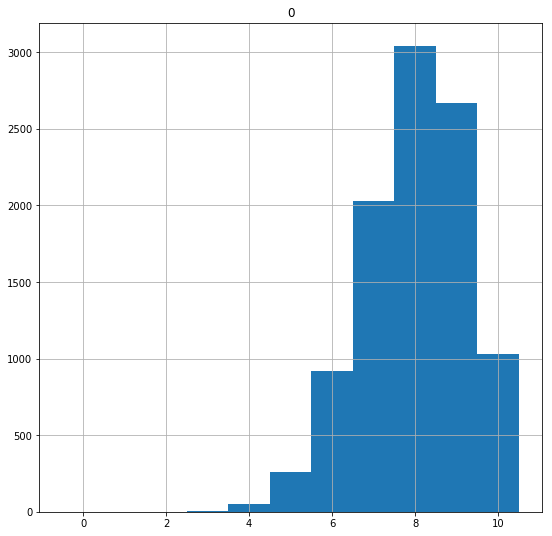

In [31]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [32]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [33]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000003

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [34]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000025

In [35]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.301989888

### The Geometric and Exponential Distributions

The geometric and exponential distributions model the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

The scipy nickname for the geometric distribution is "geom". Let's use the geom functions to model the number of trials it takes to get a success (heads) when flipping a fair coin:

col_0     1     2     3    4    5    6   7   8   9   10  11  13  14
row_0                                                              
counts  4885  2494  1315  640  325  167  92  49  18   6   6   2   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1aee8c88>]],
      dtype=object)

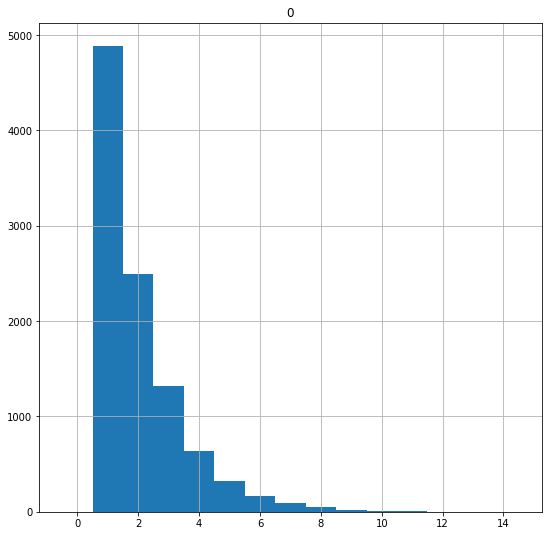

In [36]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)

The distribution looks similar to what we'd expect: it is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the 10,000 trails we generated, the longest it took to get a heads was 13 flips.

Let's use cdf() to check the probability of needing 6 flips or more to get a success:

In [37]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

Use pmf() to check the probability of seeing a specific number of flips before a successes:

In [38]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

The scipy name for the exponential distribution is "expon". Let's investigate the exponential distribution:

In [39]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

* Note: The average arrival time for the exponential distribution is equal to 1/arrival_rate.

Let's plot this exponential distribution to get an idea of its shape:

Text(1.5, 0.08, '0.368')

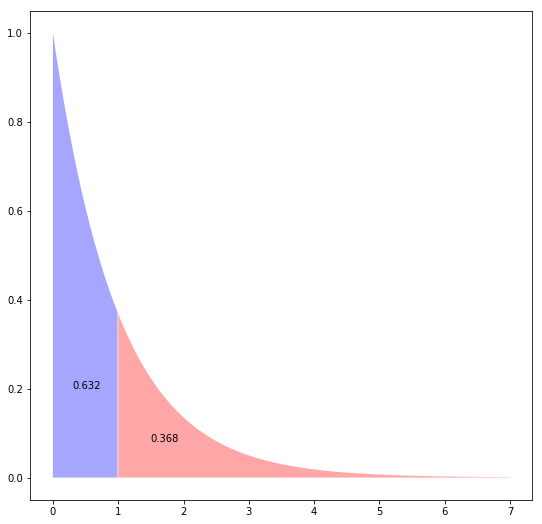

In [40]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3))

Similar to the geometric distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases where you have to wait much longer than average for an arrival.

### The Poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3728  3701  1770  614  151  32  4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1af10630>]],
      dtype=object)

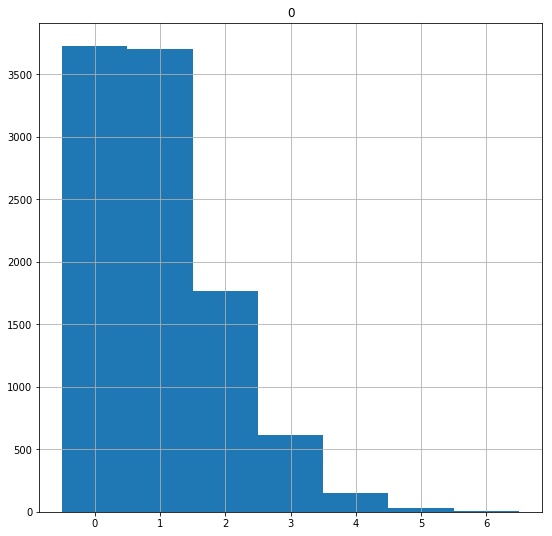

In [41]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1)

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   0   1   2   3    4    5    6    7     8     9  ...   14   15   16  \
row_0                                                  ...                  
counts   2   2  25  76  192  350  671  888  1071  1247 ...  550  336  220   

col_0    17  18  19  20  21  22  23  
row_0                                
counts  134  86  30  14  12   2   3  

[1 rows x 24 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd42390>]],
      dtype=object)

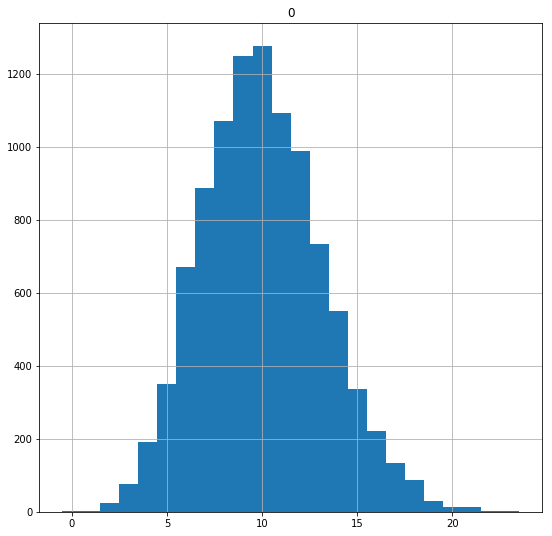

In [42]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1)

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [43]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [44]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

## Univariate Analysis
Explore variables individually. In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.

### Continuous Variables
- Understand the central tendency and spread (dispersion).
    - Central tendency
        - Mean
        - Median
        - Mode
        - Min
        - Max
    - Measures of dispersion
        - Range
        - Quartiles
        - IQR
        - Variance
        - Standard deviation
        - Skewness and Kurtosis
- Identify missing values and outliers
- Visualization methods
    - Histogram
    - BoxPlot
    
### Categorical Variables
- Understand distribution of each category, get a sense of distribution of records across the categories
    - One-way frequency or relative frequency table (count and percentage of values under a category).
- Visualization methods
    - Bar chart

In [ ]:
#histogram
sns.distplot(df_train['SalePrice']);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# The kurtosis of any univariate normal distribution is 3

In [12]:
# One-way frequency table
pd.crosstab(index=df_titanic["Survived"], columns="count")

col_0,count
Survived,
0,549
1,342


In [11]:
# One-way relative frequency table
pd.crosstab(index=df_titanic["Survived"], columns="frequency", normalize=True)

col_0,frequency
Survived,
0,0.616162
1,0.383838


In [13]:
# Bar chart

In [ ]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

Even these simple one-way tables give us some useful insight: we immediately get a sense of distribution of records across the categories.

In [ ]:
my_tab = pd.crosstab(index=titanic_train["Survived"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

In [ ]:
pd.crosstab(index=titanic_train["Pclass"],  # Make a crosstab
                      columns="count")      # Name the count column

In [ ]:
pd.crosstab(index=titanic_train["Sex"],     # Make a crosstab
                      columns="count")      # Name the count column

In [ ]:
cabin_tab = pd.crosstab(index=titanic_train["Cabin"],  # Make a crosstab
                        columns="count")               # Name the count column

cabin_tab 

One of the most useful aspects of frequency tables is that they allow you to extract the proportion of the data that belongs to each category. With a one-way table, you can do this by dividing each table value by the total number of records in the table:

In [ ]:
cabin_tab/cabin_tab.sum()

## Bi-variate Analysis
Find relationships between any two variables, continuous and categorical.

### Continuous and Continuous
Identify any linear or non-linear relationship (pattern) between two variables.

- Visualization methods
    - Scatter plot

<img src="images/correlations.png" alt="Correlations" style="width: 600px;"/>

Spearman, Pearson correlation
Correlation matrix
Correlation heatmap

Metrics
- Co-variance
- Variance
- Correlation coefficient

### Categorical and Categorical
#### Methods
Two-way `frequency or relative frequency tables` also known as `crosstabs` or `contingency` tables. A frequency table is just a data table that shows the counts of one or more categorical variables. Relative frequency tables show what percent of data points fit in each category.

In the example below ([source](https://www.khanacademy.org/math/statistics-probability/analyzing-categorical-data/two-way-tables-for-categorical-data/a/two-way-tables-review)) there are two variables - gender and preference - this is where the two in two-way frequency table comes from. Each cell tells us the number (or frequency).

<img src="images/two-way-frequency-table.png" alt="Correlations" style="width: 300px;"/>

Two-way relative frequency tables show what percent of data points fit in each category. We can use row relative frequencies or column relative frequencies, it just depends on the context of the problem.

<img src="images/two-way-relative-frequency-table.png" alt="Correlations" style="width: 600px;"/>

Sometimes your percentages won't add up to 100% even though we rounded properly. This is called `round-off error`, and we don't worry about it too much.

Two-way relative frequency tables are useful when there are different sample sizes in a dataset. In this example, more females were surveyed than males, so using percentages makes it easier to compare the preferences of males and females. From the relative frequencies, we can see that a large majority of males preferred dogs (78%) compared to a minority of females (41%).
    
    - Stacked column chart




Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables. To create a two way table, pass two variables to the pd.crosstab() function instead of one:

In [ ]:
# Table of survival vs. sex
survived_sex = pd.crosstab(index=titanic_train["Survived"], 
                           columns=titanic_train["Sex"])

survived_sex.index= ["died","survived"]

survived_sex

In [ ]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=titanic_train["Survived"], 
                            columns=titanic_train["Pclass"])

survived_class.columns = ["class1","class2","class3"]
survived_class.index= ["died","survived"]

survived_class

In [ ]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=titanic_train["Survived"], 
                            columns=titanic_train["Pclass"],
                             margins=True)   # Include row and column totals

survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class.index= ["died","survived","coltotal"]

survived_class

In [ ]:
# To get the total proportion of counts in each cell, 
# divide the table by the grand total:
survived_class/survived_class.ix["coltotal","rowtotal"]

In [ ]:
# To get the proportion of counts along each column 
# (in this case, the survival rate within each passenger class) 
# divide by the column totals:
survived_class/survived_class.ix["coltotal"]

To get the proportion of counts along each row divide by the row totals. The division operator functions on a row-by-row basis when used on DataFrames by default. In this case we want to divide each column by the rowtotals column. To get division to work on a column by column basis, use df.div() with the axis set to 0 (or "index"):

In [ ]:
survived_class.div(survived_class["rowtotal"],
                   axis=0)

In [ ]:
# Correlation matrix (heatmap style)
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#saleprice correlation matrix (dependent variable)
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
# Relationship with numerical variables
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
# Relationship with categorical features
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [18]:
# Two-way table
# Table of survival vs. sex
survived_sex = pd.crosstab(index=df_titanic["Survived"], columns=df_titanic["Sex"])
survived_sex.index= ["died", "survived"]
survived_sex

Sex,female,male
died,81,468
survived,233,109


In [20]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=df_titanic["Survived"], 
                            columns=df_titanic["Pclass"])

survived_class.columns = ["class1","class2","class3"]
survived_class.index= ["died","survived"]

survived_class

,class1,class2,class3
died,80,97,372
survived,136,87,119


In [22]:
# get the marginal counts (totals for each row and column) by including the argument margins=True
# Table of survival vs passenger class
survived_class = pd.crosstab(index=df_titanic["Survived"], 
                            columns=df_titanic["Pclass"],
                             margins=True)   # Include row and column totals

survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class.index= ["died","survived","coltotal"]

survived_class

,class1,class2,class3,rowtotal
died,80,97,372,549
survived,136,87,119,342
coltotal,216,184,491,891


In [23]:
survived_class = pd.crosstab(index=df_titanic["Survived"], 
                            columns=df_titanic["Pclass"],
                             margins=True, normalize=True)   # Include row and column totals

survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class.index= ["died","survived","coltotal"]

survived_class

,class1,class2,class3,rowtotal
died,0.089787,0.108866,0.417508,0.616162
survived,0.152637,0.097643,0.133558,0.383838
coltotal,0.242424,0.206510,0.551066,1.000000


The crosstab() function lets you create tables out of more than two categories. Higher dimensional tables can be a little confusing to look at, but they can also yield finer-grained insight into interactions between multiple variables. Let's create a 3-way table inspecting survival, sex and passenger class:

In [ ]:
surv_sex_class = pd.crosstab(index=titanic_train["Survived"], 
                             columns=[titanic_train["Pclass"],
                                      titanic_train["Sex"]],
                             margins=True)   # Include row and column totals

surv_sex_class

Notice that by passing a second variable to the columns argument, the resulting table has columns categorized by both Pclass and Sex. The outermost index (Pclass) returns sections of the table instead of individual columns:

In [ ]:
surv_sex_class[2]        # Get the subtable under Pclass 2

In [ ]:
surv_sex_class[2]["female"]   # Get female column within Pclass 2

In [ ]:
# get the proportion of survival across each column
surv_sex_class/surv_sex_class.ix["All"]    # Divide by column totals

Here we see something quite interesting: over 90% of women in first class and second class survived, but only 50% of women in third class survived. Men in first class also survived at a greater rate than men in lower classes. Passenger class seems to have a significant impact on survival, so it would likely be useful to include as a feature in a predictive model.

`Stacked column chart`

In [24]:
# Stacked column chart

`Chi_Square Test` is used to derive statistical significance of relationship between varables. It also tests whether the evidence in the sample is strong enough to generalize the relationship for a larger population. It returns probability of the computed chi-square distribution with the degree of freedom.
- Probability of 0: both categorical variables are dependent
- Probability of 1: independent
- Probability less than 0.05: indicates that the relationship between the variables is significant at 95% of confidence

In [ ]:
# Chi-Square Test

Other statistical measures used to analyze the power of relationship are:
- Cramer's V for Nominal Categorical Variable
- Mantel-Haenszed Chi-Square for ordinal categorical variable

### Categorical and Continuous
To explore relation between a categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, there is no statistical significance.
#### Methods
- Z-test - tests if means of two groups are statistically different from each other 
- T-test - like Z-test but for categories with less than 30 samples each
- ANOVA - assesses if the average of more than two groups is statistically different

## Missing Values Handling
Missing data in the training datase can reduce the power / fit of a model or can lead to a biased model as the data do not present relationships between variables correctly. Most libraries (including scikit-learn) will give you an error if you try to build a model using data with missing values.

The most often reason for missing data are related to:
- **Data collection**. Difficult and usually time consuming to correct.
- **Data extraction**. Easy to find and corrected, mechanisms like hashing may help in ensuring that the data are extracted correctly.

<img src="images/missing-values-handling.png" alt="Correlations" style="width: 600px;"/>

[source](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

The missing values treatment can be as follows:
- **Listwise or pairwise deletion**. It is important to understand that in the vast majority of cases, an important assumption to using either of these techniques is that your data is missing completely at random (MCAR). 

    In the `listwise deletion` we delete observations (or columns) where any of the variable is missing. It is simple method but reduces the power of model by reducing the sample size. 
    
    `Pairwise deletion` occurs when the statistical procedure uses cases that contain some missing data. The procedure cannot include a particular variable when it has a missing value, but it can still use the case when analyzing other variables with non-missing values. Pairwise deletion allows you to use more of your data. However, each computed statistic may be based on a different subset of cases.

    The choice between pairwise and listwise deletion of records is limited. The choice between these two types of deletion is not relevant when only one variable is being analyzed. In other situations, missing values may be treated as a valid category. 
    
- **Mean / mode / median imputation**. Imputation means filling the missing values with estimated (most frequently used) ones. It consists of replacing the missing data for a given attribute quantitavely (mean, median) or qualitatively (mode). Mean imputation is one of the most ‘naive’ imputation methods because unlike more complex methods like k-nearest neighbors imputation, it does not use the information we have about an observation to estimate a value for it. The imputation can take forms of:

    - `Generalized imputation`. We calculate mean, median or mode for all non missing values of a variable and replace all missing values of this variable with the result.
    - `Similar case imputation`. We calculate mean, median or mode for similar cases only (looking at similarity of other variables of other cases without missing data for the variable in question).
    

- **Prediction model**. We create a predictive model (linear / logistic regression, tree, etc.) to estimate values that will substitute the missing data. To do this, we divide our dataset into two parts: one with no missing values for the variable (training dataset with a target variable), another with missing values for the variable (test dataset to pedict the target / missing variable). We populate the missing values with the predicted ones.

- **KNN Imputation**. The missing values of a variable are imputed using the given number of variables that are most similar to the attribute whose values are missing. The similarity is defined as a distance function.

    - Advantages: 
        - KNN can predict both qualitative and quantitative variables
        - Creation of a predictive model for each variable with missing data is not required
        - Variables with multiple missing values can be easily treated
        - Correlation of data is taken into consideration
    - Disadvantages:
        - KNN is time consuming
        - Choice of k-value is very critical 

In [ ]:
# Where function
my_data = np.random.uniform(-1,1,25)  # Generate new random numbers

my_data = np.where(my_data < 0,       # A logical test
                   0,                 # Value to set if the test is true
                   my_data)           # Value to set if the test is false

print(my_data)

In [ ]:
# We can get the row indexes of the missing values with np.where()
missing = np.where(titanic_train["Age"].isnull() == True)
missing

In [ ]:
len(missing[0])

In [ ]:
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

In [ ]:
# Replace NaNs in Age with 28
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
#dealing with missing data (removing)
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

In [ ]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

# remove all the rows that contain a missing value
nfl_data.dropna()

# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

In [2]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(original_data)

# make copy to avoid changing original data (when Imputing)
new_data = original_data.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())
for col in cols_with_missing:
    new_data[col + '_was_missing'] = new_data[col].isnull()

# Imputation
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
new_data.columns = original_data.columns

# example on how to use imputer: https://www.kaggle.com/dansbecker/handling-missing-values/notebook

NameError: name 'original_data' is not defined

In [ ]:
# Mean imputation
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]

# View the dataset
df

# Fit imputer
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit(df)

# Apply the imputer to the df dataset
imputed_df = mean_imputer.transform(df.values)

# View the data
imputed_df
# Notice that 0.49273333 is the imputed value, replacing the np.NaN value.

## Outliers

An `outlier` is an observation that appears far away and diverges from an overall pattern in a sample. Outliers can be of two types: univariate and multivariate. `Univariate outliers` can be found while looking at distribution of a single variable data. `Multivariate outliers` are outstanding observations in an n-dimensional space.

<img src="images/outlier.png" alt="Correlations" style="width: 300px;"/>

<img src="images/n-outlier.png" alt="Correlations" style="width: 600px;"/>

[source](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

The method of dealing with outliers depend on the reason of their occurrence. Causes of outliers can be classified in two broad categories: artificial (error) / non-natural and natural:

- artificial: data entry errors (human errors, experimental / sampling errors, intentional outlier), measurement errors (faulty instruments), data processing errors.
- natural: not caused by error.

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

- They increase the error variance and reduces the power of statistical tests.
- If the outliers are non-randomly distributed, they can decrease normality.
- They can bias or influence estimates that may be of substantive interest.
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

<img src="images/outliers-impact.png" alt="Correlations" style="width: 600px;"/>

Most commonly used method to detect outliers is visualization (like box-plot, histogram, scatter plot). Some analysts use various thumb rules to detect outliers:

- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR.
- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier.
- Data points, three or more standard deviation away from mean are considered outlier.
- Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding.
- Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as `Mahalanobis’ distance` and `Cook’s D` are frequently used to detect outliers.

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods:

- **Deleting observations**: We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

- **Transforming and binning values**: Transforming variables can also eliminate outliers. `Natural log of a value` reduces the variation caused by extreme values. `Binning` is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.

<img src="images/log-transformation.png" alt="Correlations" style="width: 600px;"/>

- **Imputing**: We can use mean, median, mode to change outlier values but before that, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

- **Treat separately**: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.

In [ ]:
# boxplots are designed to show the spread of the data and help identify outliers
# In a boxplot, the central box represents 50% of the data and the central bar represents the median. 
# The dotted lines with bars on the ends are "whiskers" which encompass the great majority of the data 
# and points beyond the whiskers indicate uncommon values.
titanic_train["Fare"].plot(kind="box",
                           figsize=(9,9))

In [ ]:
#deleting points (outliars)
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

## Feature engineering

Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

### Variables transformation

In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square or cube root, or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

Reasons for variable transformation

- When we want to `change the scale` of a variable or `standardize the values` of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution.

    Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

    There are four common methods to perform Feature Scaling:
    
    - **Standardization**. Standardization replaces the values by their Z scores. 
    
    <img src="images/standardization.png" alt="Correlations" style="width: 200px;"/>

    This redistributes the features with their mean μ = 0 and standard deviation σ =1. `sklearn.preprocessing.scale` helps us implementing standardisation in python.
    
    - **Mean Normalization**. This distribution will have values between -1 and 1 with μ=0.

    <img src="images/mean-normalization.png" alt="Correlations" style="width: 200px;"/>
    
    Standardisation and Mean Normalization can be used for algorithms that assumes zero centric data like `Principal Component Analysis (PCA)`.
    
    - **Min-Max Scaling**. This scaling brings the value between 0 and 1.
    
    <img src="images/min-max-scaling.png" alt="Correlations" style="width: 200px;"/>
    
    - **Unit Vector**. Scaling is done considering the whole feature vecture to be of unit length.
    
    <img src="images/unit-vector.png" alt="Correlations" style="width: 200px;"/>

    `Min-Max Scaling` and `Unit Vector` techniques produces values of range [0,1]. When dealing with features with hard boundaries this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.
    
    Scale variables if using any algorithm that computes distance or assumes normality. For example:

    - `k-nearest neighbors` with an Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.
    - Scaling is critical, while performing `Principal Component Analysis (PCA)`. PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.
    - We can speed up `gradient descent` by scaling. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.
    
    But for below, scalling may not help:
    
    - `Tree based models` are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.
    - Algorithms like `Linear Discriminant Analysis (LDA)` or `Naive Bayes` are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

- When we want to `transform complex non-linear relationships into linear relationships`. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation and also improves the prediction. `Log transformation` is one of the commonly used transformation technique used in these situations.

- Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques requires `normal distribution` of variables. For `right skewed distribution`, we take square / cube root or logarithm of variable and for `left skewed distribution`, we take square / cube or exponential of variables.

- When we want to group variables and represent their values in groups we use `binning`.

There are various methods used to transform variables:

- **Logarithm**: Log of a variable is a common transformation method used to change the shape of distribution of the variable. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.
- **Square / Cube root**: The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.
- **Binning**: It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform `co-variate binning` which depends on the value of more than one variables.

### Variables creation

Feature / Variable creation is a process to generate a new variables / features based on existing variable(s).

There are various techniques to create new features:

- **Creating derived variables**: This refers to creating new variables from existing variable(s) using set of functions or different methods.
- **Creating dummy variables**: One of the most common application of dummy variable is to convert categorical variable into numerical variables (0-1 encoding, or `one-hot-encoding`). Dummy variables are also called `Indicator Variables`.

In [ ]:
# Let's create a new variable, Family, that combines SibSp and Parch 
# to indicate the total number of family members 
# (siblings, spouses, parents and children) a passenger has on board:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

In [ ]:
char_cabin = titanic_train["Cabin"].astype(str)    # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

The difference between `scaling` and `normalization` is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data. Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

`Normal distribution`: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

In [ ]:
# Scale and normalize
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

# Scaling
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

# Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

# Normalization
# The method were using to normalize here is called the Box-Cox Transformation. 
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

# Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. 
# But after normalizing it looks more like the outline of a bell (hence "bell curve").



In [ ]:
# Histogram - Kurtosis and skewness.
# Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### Character encoding

Character encodings are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if you tried to read in text with a different encoding that the one it was originally written in, you ended up with scrambled text called "mojibake" (said like mo-gee-bah-kay). Here's an example of mojibake:

æ–‡å—åŒ–ã??

You might also end up with a "unknown" characters. There are what gets printed when there's no mapping between a particular byte and a character in the encoding you're using to read your byte string in and they look like this:

����������

Character encoding mismatches are less common today than they used to be, but it's definitely still a problem. There are lots of different character encodings, but the main one you need to know is UTF-8.

UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)



If you look at a bytes object, you'll see that it has a b in front of it, and then maybe some text after. That's because bytes are printed out as if they were characters encoded in ASCII. (ASCII is an older character encoding that doesn't really work for writing any language other than English.) Here you can see that our euro symbol has been replaced with some mojibake that looks like "\xe2\x82\xac" when it's printed as if it were an ASCII string.

In [ ]:
# take a look at what the bytes look like
after

When we convert our bytes back to a string with the correct encoding, we can see that our text is all there correctly, which is great! :)

In [ ]:
# convert it back to utf-8
print(after.decode("utf-8"))

However, when we try to use a different encoding to map our bytes into a string,, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. You need to tell Python the encoding that the byte string is actually supposed to be in.

You can think of different encodings as different ways of recording music. You can record the same music on a CD, cassette tape or 8-track. While the music may sound more-or-less the same, you need to use the right equipment to play the music from each recording format. The correct decoder is like a cassette player or a cd player. If you try to play a cassette in a CD player, it just won't work.

In [ ]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

We can also run into trouble if we try to use the wrong encoding to map from a string to bytes. Like I said earlier, strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems.

For example, if we try to convert a string to bytes for ascii using encode(), we can ask for the bytes to be what they would be if the text was in ASCII. Since our text isn't in ASCII, though, there will be some characters it can't handle. We can automatically replace the characters that ASCII can't handle. If we do that, however, any characters not in ASCII will just be replaced with the unknown character. Then, when we convert the bytes back to a string, the character will be replaced with the unknown character. The dangerous part about this is that there's not way to tell which character it should have been. That means we may have just made our data unusable!

In [ ]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8 is when you read in files, which we'll talk about next.

First, however, try converting between bytes and strings with different encodings and see what happens. Notice what this does to your text. Would you want this to happen to data you were trying to analyze?

### Reading in files with encoding problems

Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes you'll get an error like this:

In [ ]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("../input/kickstarter-projects/ks-projects-201612.csv")

Notice that we get the same UnicodeDecodeError we got when we tried to decode UTF-8 bytes as if they were ASCII! This tells us that this file isn't actually UTF-8. We don't know what encoding it actually is though. One way to figure it out is to try and test a bunch of different character encodings and see if any of them work. A better way, though, is to use the chardet module to try and automatically guess what the right encoding is. It's not 100% guaranteed to be right, but it's usually faster than just trying to guess.

I'm going to just look at the first ten thousand bytes of this file. This is usually enough for a good guess about what the encoding is and is much faster than trying to look at the whole file. (Especially with a large file this can be very slow.) Another reason to just look at the first part of the file is that we can see by looking at the error message that the first problem is the 11th character. So we probably only need to look at the first little bit of the file to figure out what's going on.

In [ ]:
# look at the first ten thousand bytes to guess the character encoding
with open("../input/kickstarter-projects/ks-projects-201801.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

So chardet is 73% confidence that the right encoding is "Windows-1252". Let's see if that's correct:

In [ ]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("../input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

Yep, looks like chardet was right! The file reads in with no problem (although we do get a warning about datatypes) and when we look at the first few rows it seems to be be fine.

What if the encoding chardet guesses isn't right? Since chardet is basically just a fancy guesser, sometimes it will guess the wrong encoding. One thing you can try is looking at more or less of the file and seeing if you get a different result and then try that.

### Saving your files with UTF-8 encoding

Finally, once you've gone through all the trouble of getting your file into UTF-8, you'll probably want to keep it that way. The easiest way to do that is to save your files with UTF-8 encoding. The good news is, since UTF-8 is the standard encoding in Python, when you save a file it will be saved as UTF-8 by default:

In [ ]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

### Working with dates

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")
landslides = pd.read_csv("../input/landslide-events/catalog.csv")
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")

# set seed for reproducibility
np.random.seed(0)

# print the first few rows of the date column
print(landslides['date'].head())

# Pandas uses the "object" dtype for storing various types of data types, 
# but most often when you see a column with the dtype "object" it will have strings in it.

# check the data type of our date column
landslides['date'].dtype

# create a new column, date_parsed, with the parsed dates
# http://strftime.org/
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

# print the first few rows (the dtype is datetime64)
landslides['date_parsed'].head()



What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

In [ ]:
landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [ ]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day 



One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

In [ ]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

### Inconsistent data entry


## Plotting with Pandas

Visualizations are one of the most powerful tools at your disposal for exploring data and communicating data insights. The pandas library includes basic plotting capabilities that let you create a variety of plots from DataFrames. Plots in pandas are built on top of a popular Python plotting library called matplotlib

In [6]:
import matplotlib

# conda search ggplot
# conda install -c conda-forge ggplot
#from ggplot import diamonds
#matplotlib.style.use('ggplot')       # Use ggplot style plots*

ModuleNotFoundError: No module named 'ggplot'

A `histogram` is a univariate plot (a plot that displays one variable) that groups a numeric variable into bins and displays the number of observations that fall within each bin. A histogram is a useful tool for getting a sense of the distribution of a numeric variable. Let's create a histogram of diamond carat weight with the df.hist() function:

In [ ]:
diamonds.hist(column="carat",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue")          # Plot color

In [ ]:
diamonds.hist(column="carat",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=50,               # Use 50 bins
              range= (0,3.5))        # Limit x-axis range

`Boxplots` are another type of univariate plot for summarizing distributions of numeric data graphically. Let's make a boxplot of carat using the pd.boxplot() function. the central box of the boxplot represents the middle 50% of the observations, the central bar is the median and the bars at the end of the dotted lines (whiskers) encapsulate the great majority of the observations. Circles that lie beyond the end of the whiskers are data points that may be outliers.

In [ ]:
diamonds.boxplot(column="carat")

One of the most useful features of a boxplot is the ability to make side-by-side boxplots. A side-by-side boxplot takes a numeric variable and splits it on based on some categorical variable, drawing a different boxplot for each level of the categorical variable. Let's make a side-by-side boxplot of diamond price split by diamond clarity:

In [ ]:
diamonds.boxplot(column="price",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8))        # Figure size

A `density plot` shows the distribution of a numeric variable with a continuous curve. It is similar to a histogram but without discrete bins, a density plot gives a better picture of the underlying shape of a distribution. Create a density plot with series.plot(kind="density")

In [ ]:
diamonds["carat"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,5))      # Limit x axis values

`Barplots` are graphs that visually display counts of categorical variables. We can create a barplot by creating a table of counts for a certain variable using the pd.crosstab() function and then passing the counts to df.plot(kind="bar"):

In [ ]:
carat_table = pd.crosstab(index=diamonds["clarity"], columns="count")
carat_table

In [ ]:
carat_table.plot(kind="bar",
                 figsize=(8,8))

You can use a two dimensional table to create a `stacked barplot`. Stacked barplots show the distribution of a second categorical variable within each bar:

In [ ]:
carat_table = pd.crosstab(index=diamonds["clarity"], 
                          columns=diamonds["color"])

carat_table

In [ ]:
carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

A `grouped barplot` is an alternative to a stacked barplot that gives each stacked section its own bar. To make a grouped barplot, do not include the stacked argument (or set stacked=False):

In [ ]:
carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False) 

`Scatterplots` are bivariate (two variable) plots that take two numeric variables and plot data points on the x/y plane. To create a single scatterplot, use df.plot(kind="scatter"):

In [ ]:
diamonds.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(10,10),
              ylim=(0,20000))  

`Line plots` are charts used to show the change in a numeric variable based on some other ordered variable. Line plots are often used to plot time series data to show the evolution of a variable over time. Line plots are the default plot type when using df.plot() so you don't have to specify the kind argument when making a line plot in pandas. 

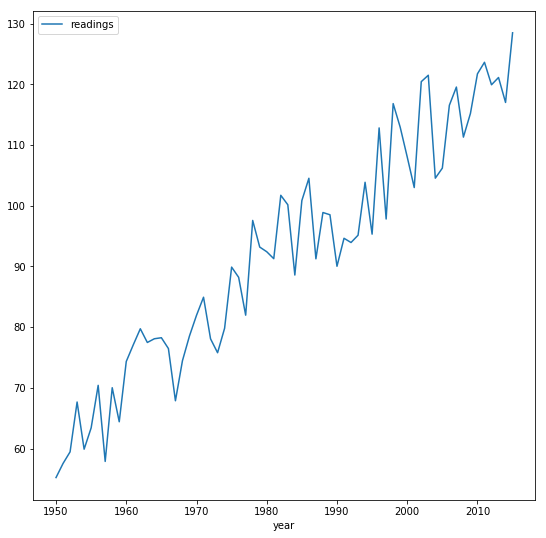

In [2]:
# Create some data
years = [y for y in range(1950,2016)]

readings = [(y+np.random.uniform(0,20)-1900) for y in years]

time_df = pd.DataFrame({"year":years,
                        "readings":readings})

# Plot the data
time_df.plot(x="year",
             y="readings",
             figsize=(9,9))

If you want to save plots for later use, you can export the plot figure (plot information) to a file. First get the plot figure with plot.get_figure() and then save it to a file with figure.savefig("filename"). You can save plots to a variety of common image file formats, such as png, jpeg and pdf.

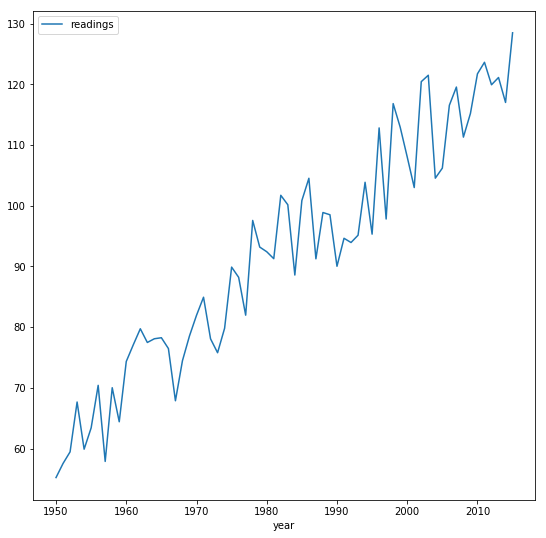

In [3]:
my_plot = time_df.plot(x="year",     # Create the plot and save to a variable
             y="readings",
             figsize=(9,9))

my_fig = my_plot.get_figure()            # Get the figure

my_fig.savefig("line_plot_example.png")  # Save to file

# References
- [Kaggle Data Cleaning Challenge](https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry/)
- [Kaggle Resampling strategies for imbalanced datasets](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)
- [8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)